[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


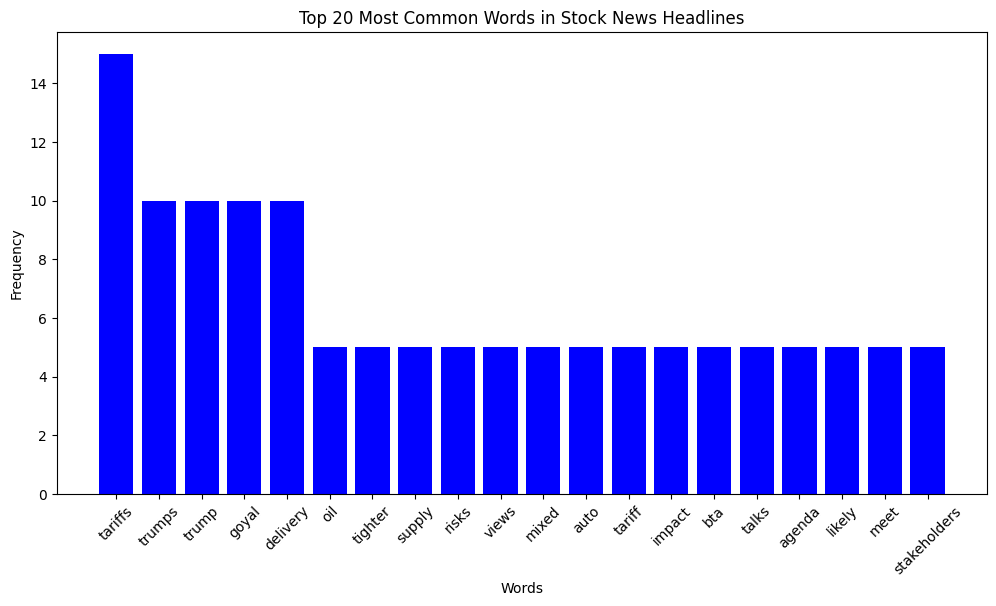

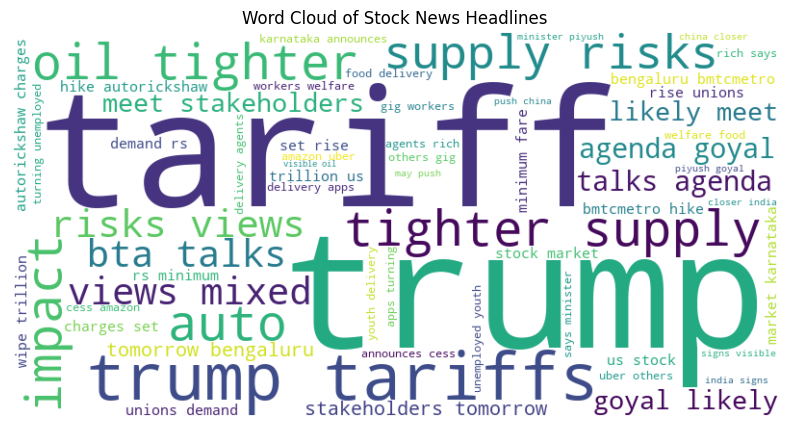

In [5]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Set path to the data folder
data_folder = "data"

# Read all CSV files and combine headlines
all_headlines = []

for file in os.listdir(data_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(data_folder, file)
        df = pd.read_csv(file_path)
        
        if "Headline" in df.columns:  # Ensure column exists
            all_headlines.extend(df["Headline"].dropna().tolist())

# Preprocess: Remove punctuation and stopwords
stop_words = set(stopwords.words("english"))
translator = str.maketrans("", "", string.punctuation)

cleaned_words = []

for headline in all_headlines:
    words = headline.lower().translate(translator).split()
    cleaned_words.extend([word for word in words if word not in stop_words])

# Count word frequency
word_freq = Counter(cleaned_words)
top_words = word_freq.most_common(20)  # Top 20 most common words

# Display word frequency as a bar chart
words, counts = zip(*top_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color="blue")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Stock News Headlines")
plt.show()

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(cleaned_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Stock News Headlines")
plt.show()


In [2]:
!pip install wordcloud



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
